### Problem Statement

Rain Prediction –Weather forecasting

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.



### Dataset Description

Number of columns: 23


Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am. 

Cloud3pm -Fraction of sky obscured by cloud 

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".



### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv')
df

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

In [3]:
df.shape

(8425, 23)

It has 8425 rows & 23 columns

In [4]:
df.head()  #first five rows of the dataset

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [5]:
df.tail() #last five rows of the dataset

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[5 rows x 23 columns]

In [6]:
df.columns  #columns present in the datsaset

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.nunique()  #unique no of values in each column

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [8]:
df.info()  #a brief info about each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

###  Checking null values

In [9]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

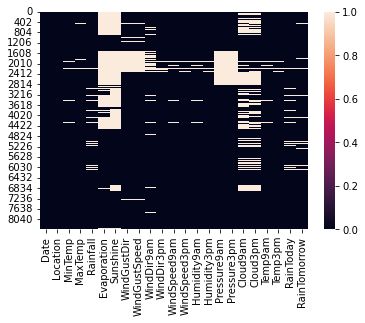

In [10]:
sns.heatmap(df.isnull())   #plotting null values using heatmap

#### Handling the null values

In [11]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())

In [12]:
df['RainTomorrow'].mode()

0    No
dtype: object

In [13]:
df['MaxTemp']=df['MaxTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Evaporation']=df['Evaporation'].fillna(df['Evaporation'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustDir']=df['WindGustDir'].fillna('N')
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindDir9am']=df['WindDir9am'].fillna('N')
df['WindDir3pm']=df['WindDir3pm'].fillna('SE')
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())
df['RainToday']=df['RainToday'].fillna('No')
df['RainTomorrow']=df['RainTomorrow'].fillna('No')

In [14]:
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

Hence there is no null value

In [15]:
# creating a separate columns for the month, date and year 

df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)
df['Year']=df['Date'].apply(lambda x:x.year)

df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6     5.389395  7.632205   
1 2008-12-02   Albury      7.4     25.1       0.0     5.389395  7.632205   
2 2008-12-03   Albury     12.9     25.7       0.0     5.389395  7.632205   
3 2008-12-04   Albury      9.2     28.0       0.0     5.389395  7.632205   
4 2008-12-05   Albury     17.5     32.3       1.0     5.389395  7.632205   

  WindGustDir  WindGustSpeed WindDir9am  ... Pressure3pm  Cloud9am  Cloud3pm  \
0           W           44.0          W  ...      1007.1  8.000000  4.503183   
1         WNW           44.0        NNW  ...      1007.8  4.566622  4.503183   
2         WSW           46.0          W  ...      1008.7  4.566622  2.000000   
3          NE           24.0         SE  ...      1012.8  4.566622  4.503183   
4           W           41.0        ENE  ...      1006.0  7.000000  8.000000   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Month  Day  Year  
0     16.9     21.8         No            No     12    1  2008  
1     17.2     24.3         No            No     12    2  2008  
2     21.0     23.2         No            No     12    3  2008  
3     18.1     26.5         No            No     12    4  2008  
4     17.8     29.7         No            No     12    5  2008  

[5 rows x 26 columns]

### Univariate analysis

<Figure size 432x288 with 0 Axes>

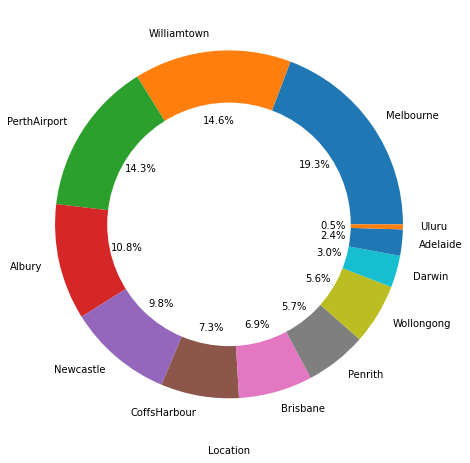

<Figure size 432x288 with 0 Axes>

In [16]:
plt.figure(figsize=(10,8))
df['Location'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel('Location')
plt.ylabel('')
plt.figure()

We have the Melbourne data more

<Figure size 432x288 with 0 Axes>

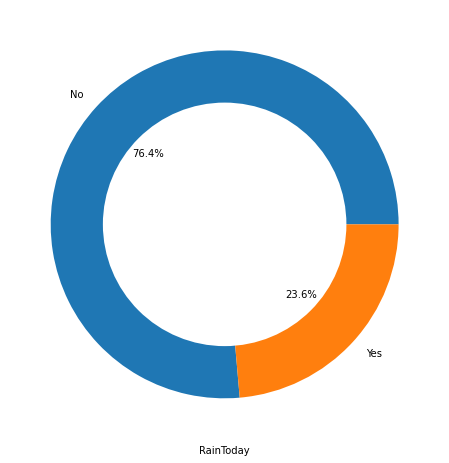

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure(figsize=(10,8))
df['RainToday'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel('RainToday')
plt.ylabel('')
plt.figure()

There is very less chance of rain on today

<Figure size 432x288 with 0 Axes>

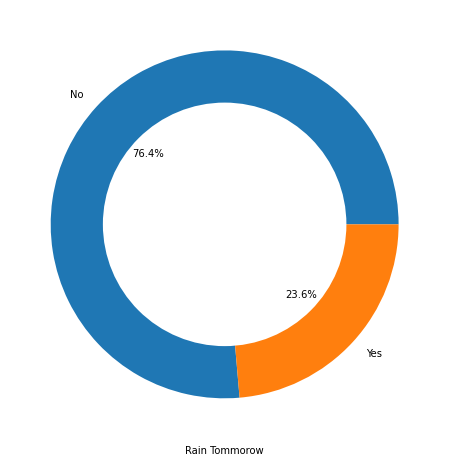

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure(figsize=(10,8))
df['RainTomorrow'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.xlabel('Rain Tommorow')
plt.ylabel('')
plt.figure()

Less chance of rain tommorow as well

<AxesSubplot:xlabel='WindGustDir', ylabel='count'>

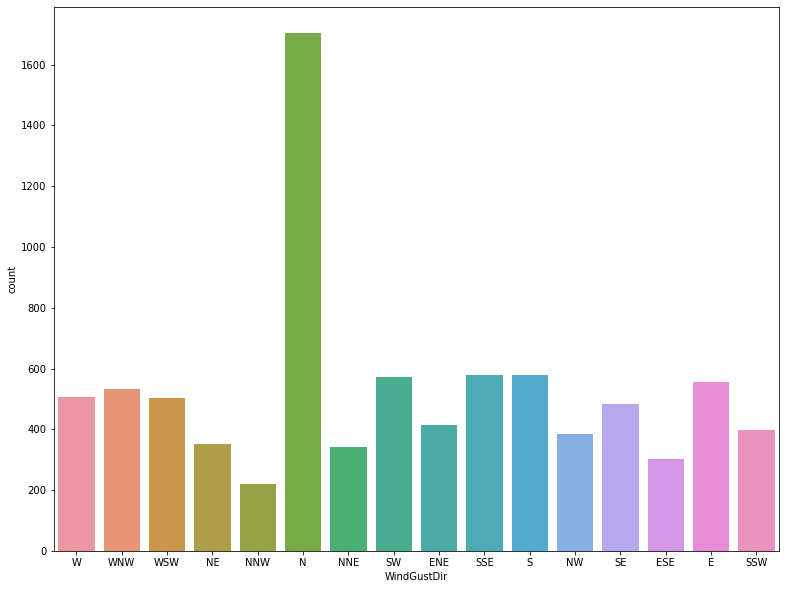

In [19]:
plt.figure(figsize=(13,10))
sns.countplot(df['WindGustDir'])

Most of the time wind direction is North

<AxesSubplot:xlabel='WindDir9am', ylabel='count'>

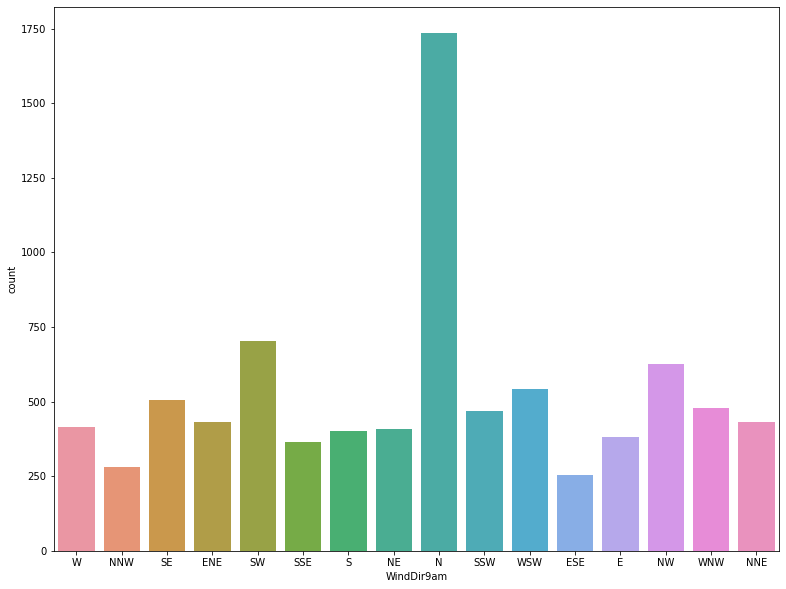

In [20]:
plt.figure(figsize=(13,10))
sns.countplot(df['WindDir9am'])

at 9 am wind direction is N mostly

<AxesSubplot:xlabel='WindDir3pm', ylabel='count'>

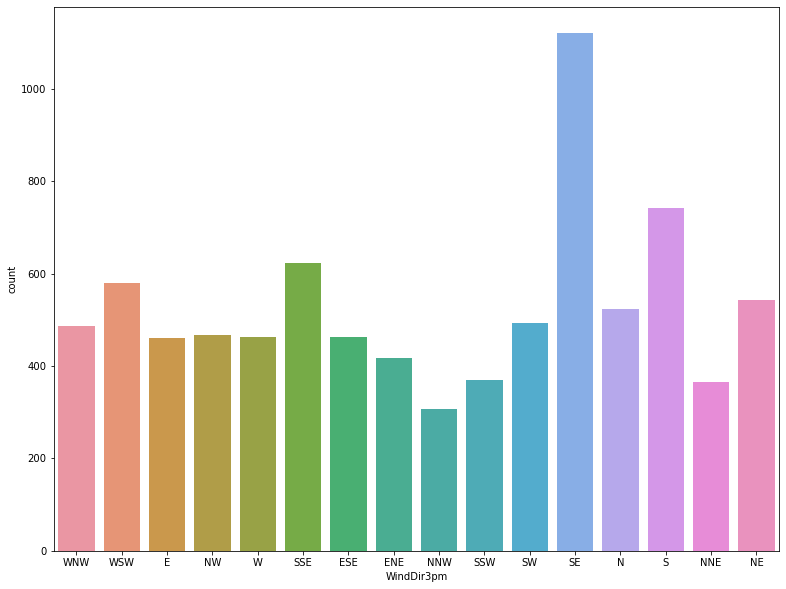

In [21]:
plt.figure(figsize=(13,10))
sns.countplot(df['WindDir3pm'])

At 3 pm wind direction is SE mostly

#### Bivariate analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Albury'),
  Text(1, 0, 'CoffsHarbour'),
  Text(2, 0, 'Newcastle'),
  Text(3, 0, 'Penrith'),
  Text(4, 0, 'Williamtown'),
  Text(5, 0, 'Wollongong'),
  Text(6, 0, 'Melbourne'),
  Text(7, 0, 'Brisbane'),
  Text(8, 0, 'Adelaide'),
  Text(9, 0, 'PerthAirport'),
  Text(10, 0, 'Darwin'),
  Text(11, 0, 'Uluru')])

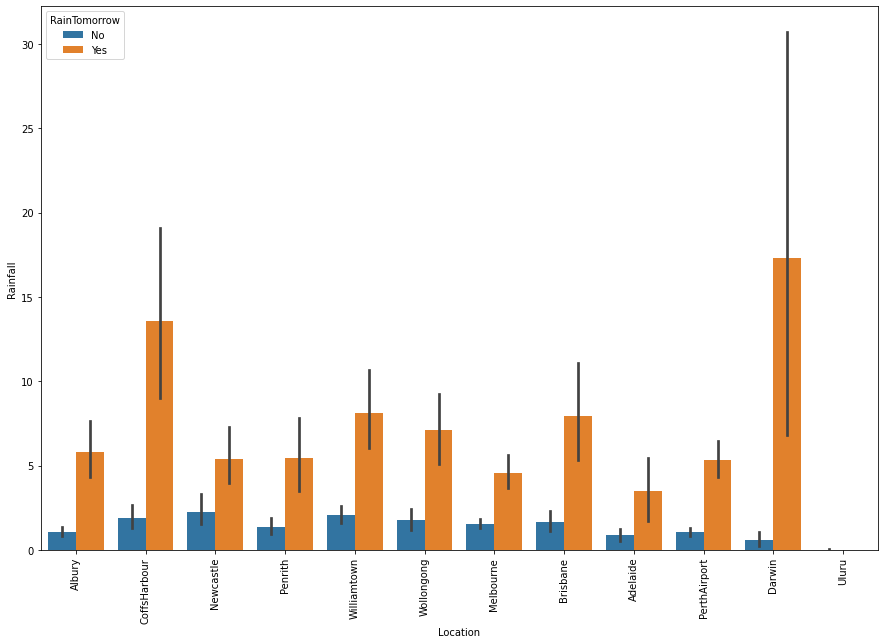

In [22]:
plt.figure(figsize=(15,10))
sns.barplot(df['Location'],df['Rainfall'],hue=df['RainTomorrow'])
plt.xticks(rotation=90)

in darwin there is chance of rain tomorrow followed by coffsharbour

<AxesSubplot:xlabel='Sunshine', ylabel='RainTomorrow'>

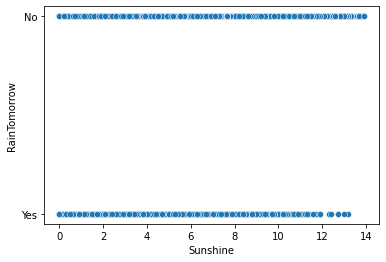

In [23]:
sns.scatterplot(df['Sunshine'],df['RainTomorrow'])

Data is equally distributed

<AxesSubplot:xlabel='MinTemp', ylabel='RainTomorrow'>

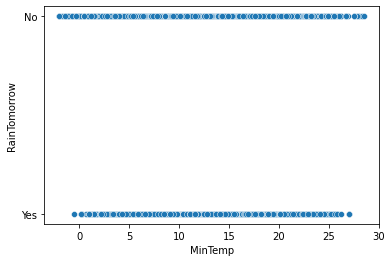

In [24]:
sns.scatterplot(df['MinTemp'],df['RainTomorrow'])

Data is equally distributed

<AxesSubplot:xlabel='MaxTemp', ylabel='RainTomorrow'>

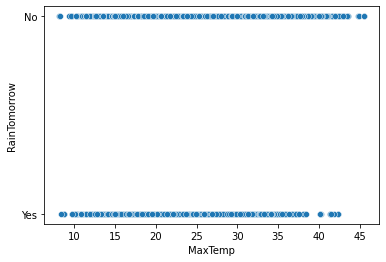

In [25]:
sns.scatterplot(df['MaxTemp'],df['RainTomorrow'])

Data is equally distributed

<AxesSubplot:xlabel='Evaporation', ylabel='RainTomorrow'>

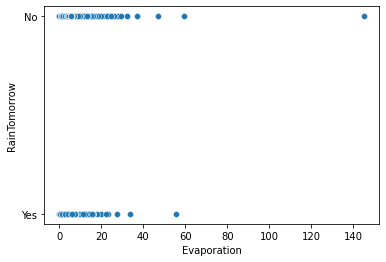

In [26]:
sns.scatterplot(df['Evaporation'],df['RainTomorrow'])

Data is on lower side

<AxesSubplot:xlabel='Sunshine', ylabel='RainTomorrow'>

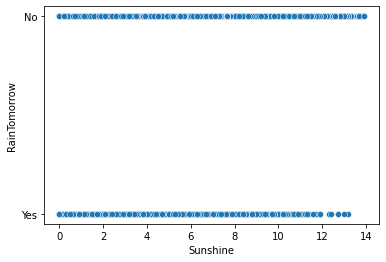

In [27]:
sns.scatterplot(df['Sunshine'],df['RainTomorrow'])

Data is equally distributed

<AxesSubplot:xlabel='WindGustSpeed', ylabel='RainTomorrow'>

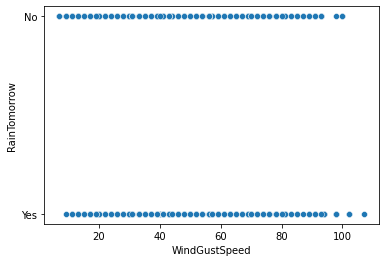

In [28]:
sns.scatterplot(df['WindGustSpeed'],df['RainTomorrow'])

Data is equally distributed

<AxesSubplot:xlabel='Humidity9am', ylabel='RainTomorrow'>

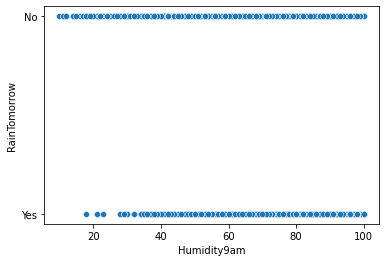

In [29]:
sns.scatterplot(df['Humidity9am'],df['RainTomorrow'])

Data is equally distributed

<AxesSubplot:xlabel='Humidity3pm', ylabel='RainTomorrow'>

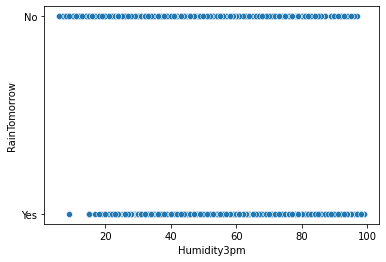

In [30]:
sns.scatterplot(df['Humidity3pm'],df['RainTomorrow'])

Data is equally distributed

<AxesSubplot:xlabel='Pressure9am', ylabel='RainTomorrow'>

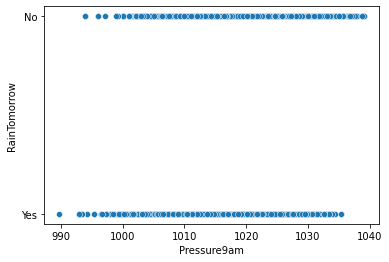

In [31]:
sns.scatterplot(df['Pressure9am'],df['RainTomorrow'])

Data is equally distributed

<AxesSubplot:xlabel='Pressure3pm', ylabel='RainTomorrow'>

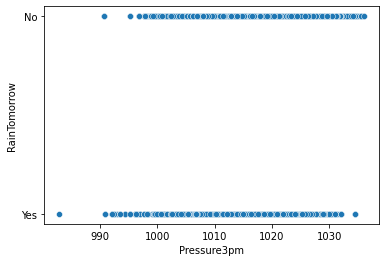

In [32]:
sns.scatterplot(df['Pressure3pm'],df['RainTomorrow'])

Data is equally distributed

<AxesSubplot:xlabel='Month', ylabel='Rainfall'>

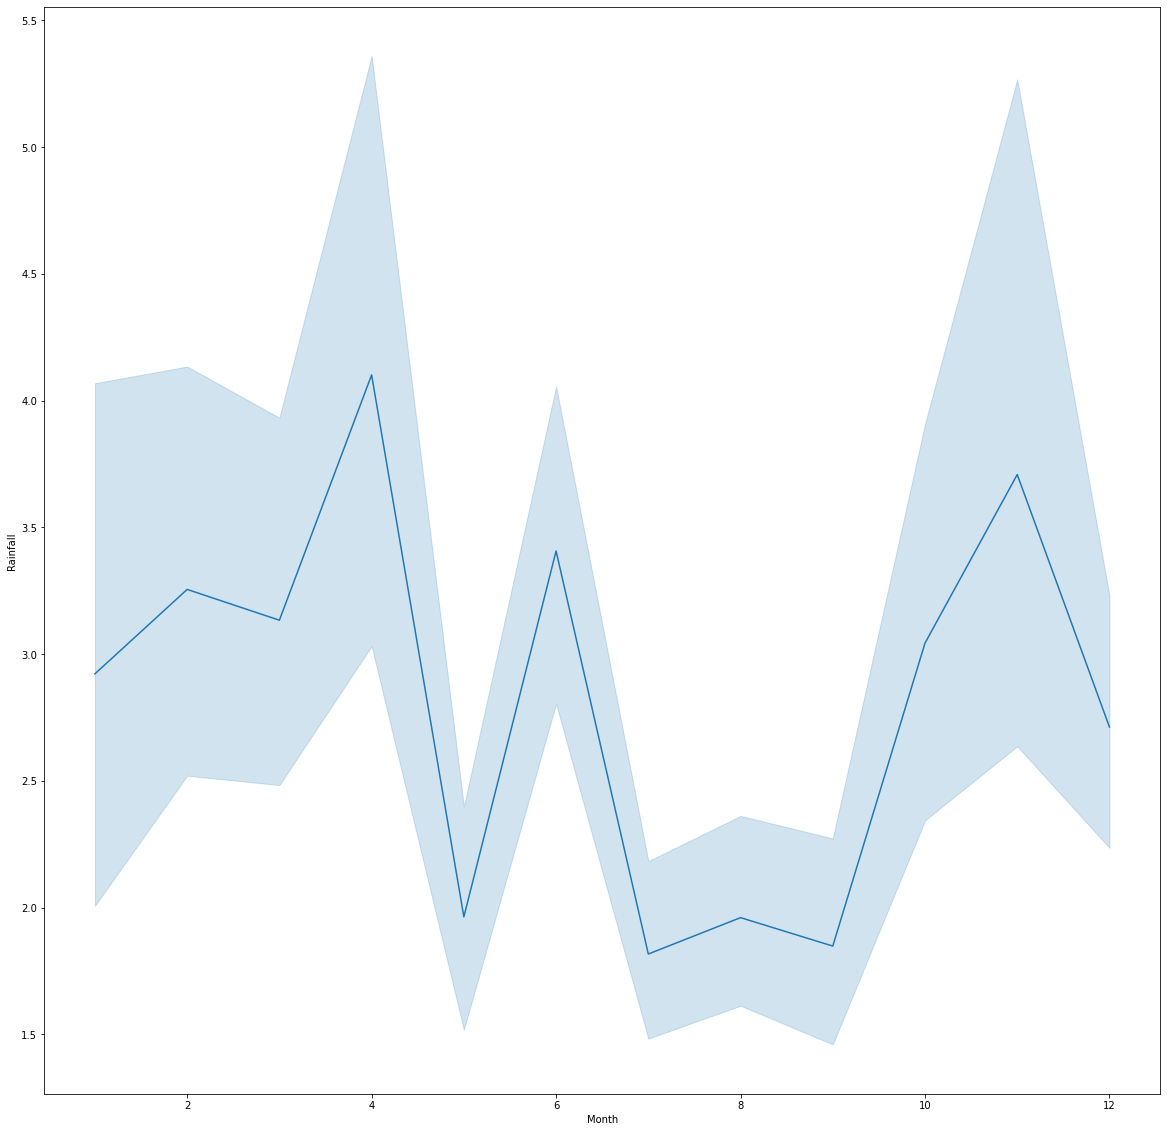

In [34]:
plt.figure(figsize=(20,20))
sns.lineplot(df['Month'],df['Rainfall'])

A very high rainfall is recorded in the month of april & november

<AxesSubplot:xlabel='Year', ylabel='Rainfall'>

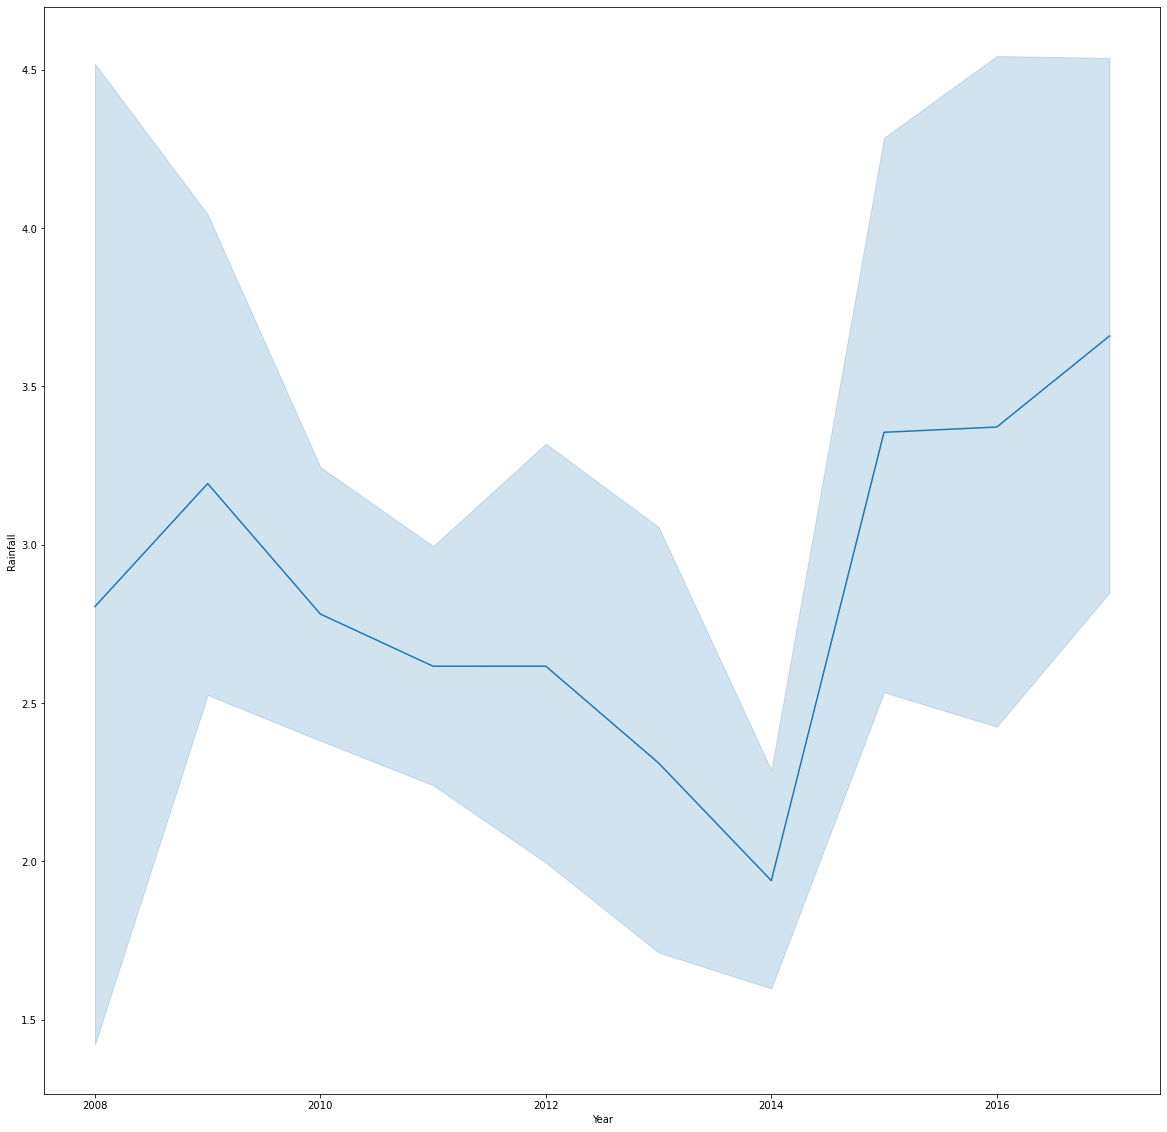

In [35]:
plt.figure(figsize=(20,20))
sns.lineplot(df['Year'],df['Rainfall'])

high rainfall is recorded in 2008 & 2016

<AxesSubplot:xlabel='Day', ylabel='Rainfall'>

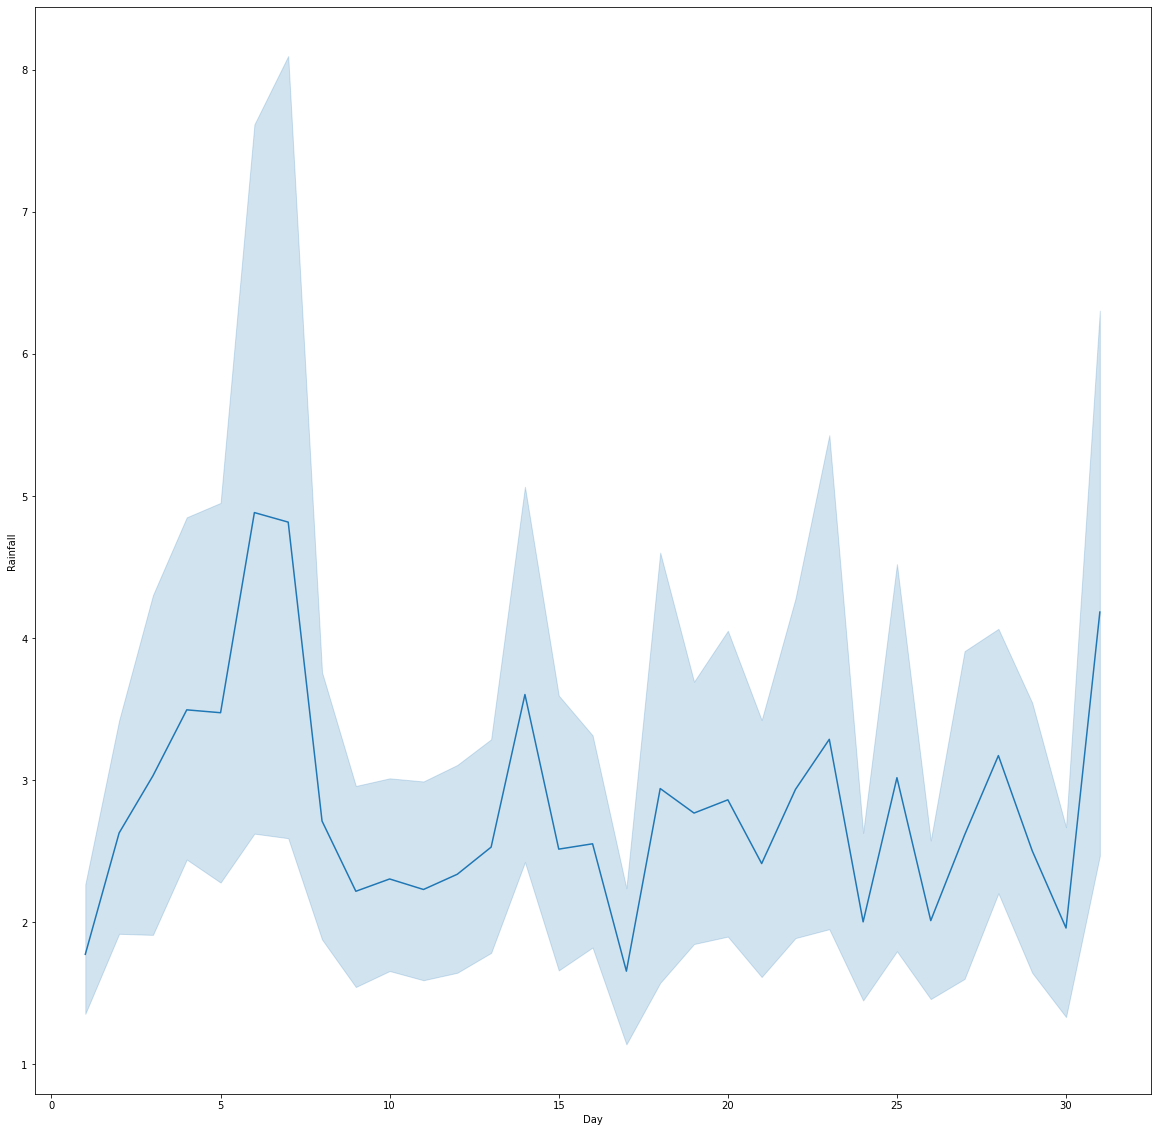

In [36]:
plt.figure(figsize=(20,20))
sns.lineplot(df['Day'],df['Rainfall'])

high rainfall is there in the starting of the month

<AxesSubplot:xlabel='Cloud9am', ylabel='Rainfall'>

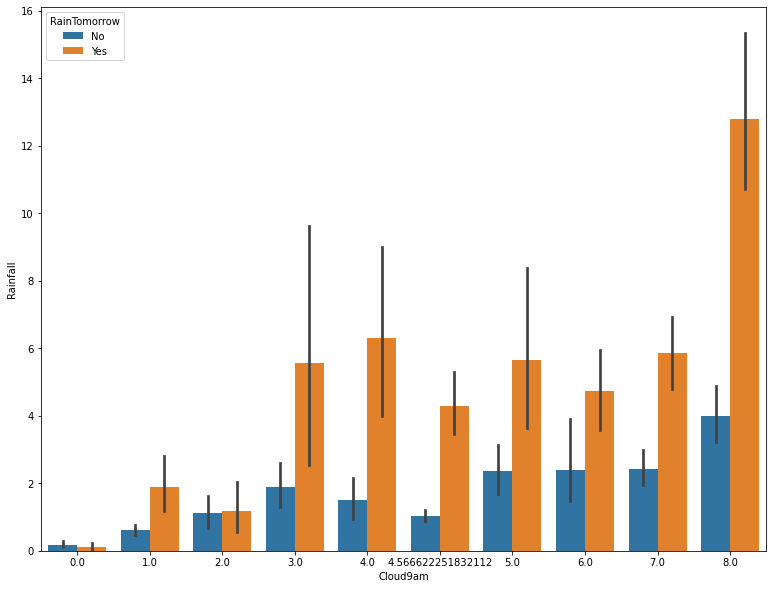

In [37]:
plt.figure(figsize=(13,10))
sns.barplot(df['Cloud9am'],df['Rainfall'],hue=df['RainTomorrow'])

when there is more cloud at 9 am there will more rainfall on tomorrow

<AxesSubplot:xlabel='WindGustDir', ylabel='Rainfall'>

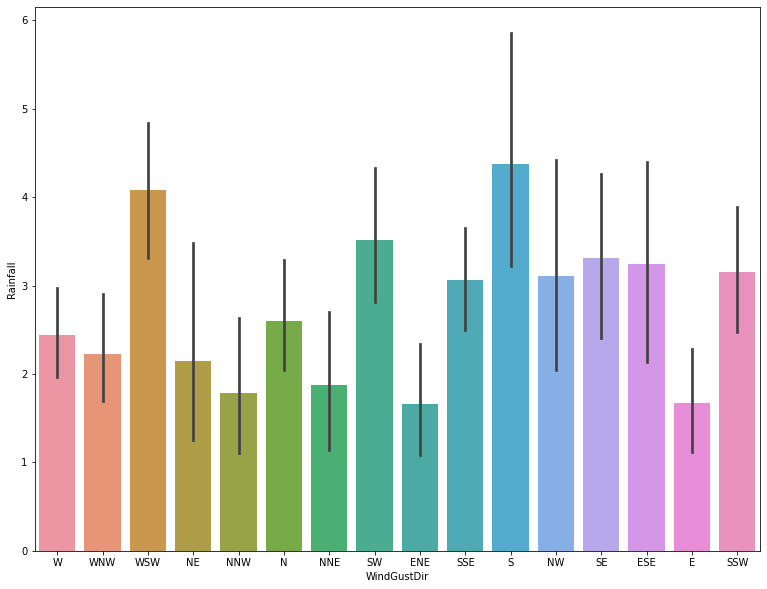

In [38]:
plt.figure(figsize=(13,10))
sns.barplot(df['WindGustDir'],df['Rainfall'])

whwn wind direction is S or WSW there will be more rainfall

<AxesSubplot:xlabel='Cloud3pm', ylabel='Rainfall'>

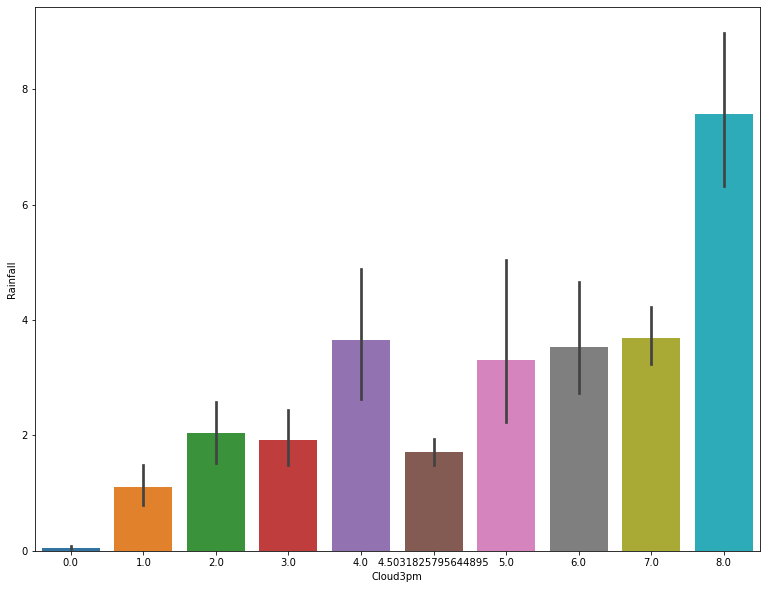

In [40]:
plt.figure(figsize=(13,10))
sns.barplot(df['Cloud3pm'],df['Rainfall'])

more cloud means more chance of rainfall

<AxesSubplot:xlabel='Location', ylabel='Rainfall'>

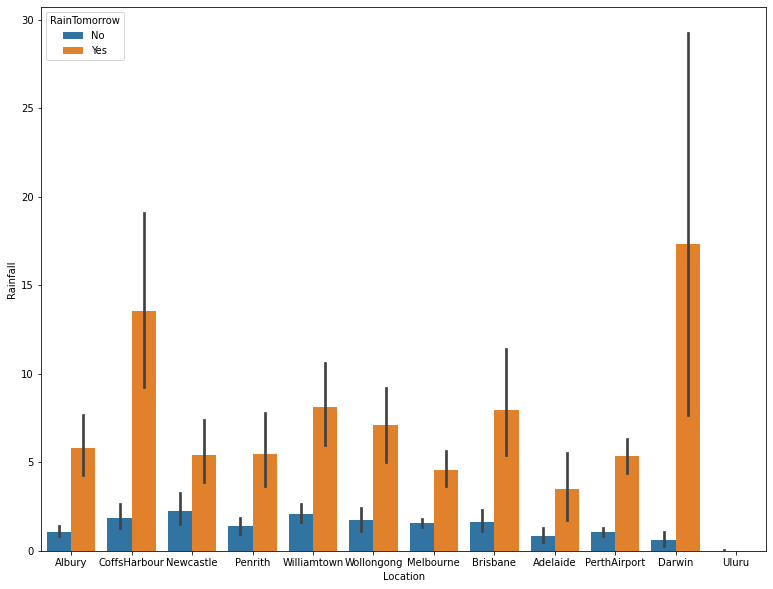

In [41]:
plt.figure(figsize=(13,10))
sns.barplot(df['Location'],df['Rainfall'],hue=df['RainTomorrow'])

Coffsharbour & Darwin can experience a good rainfall on tomorrow

#### Multivaraite analysis

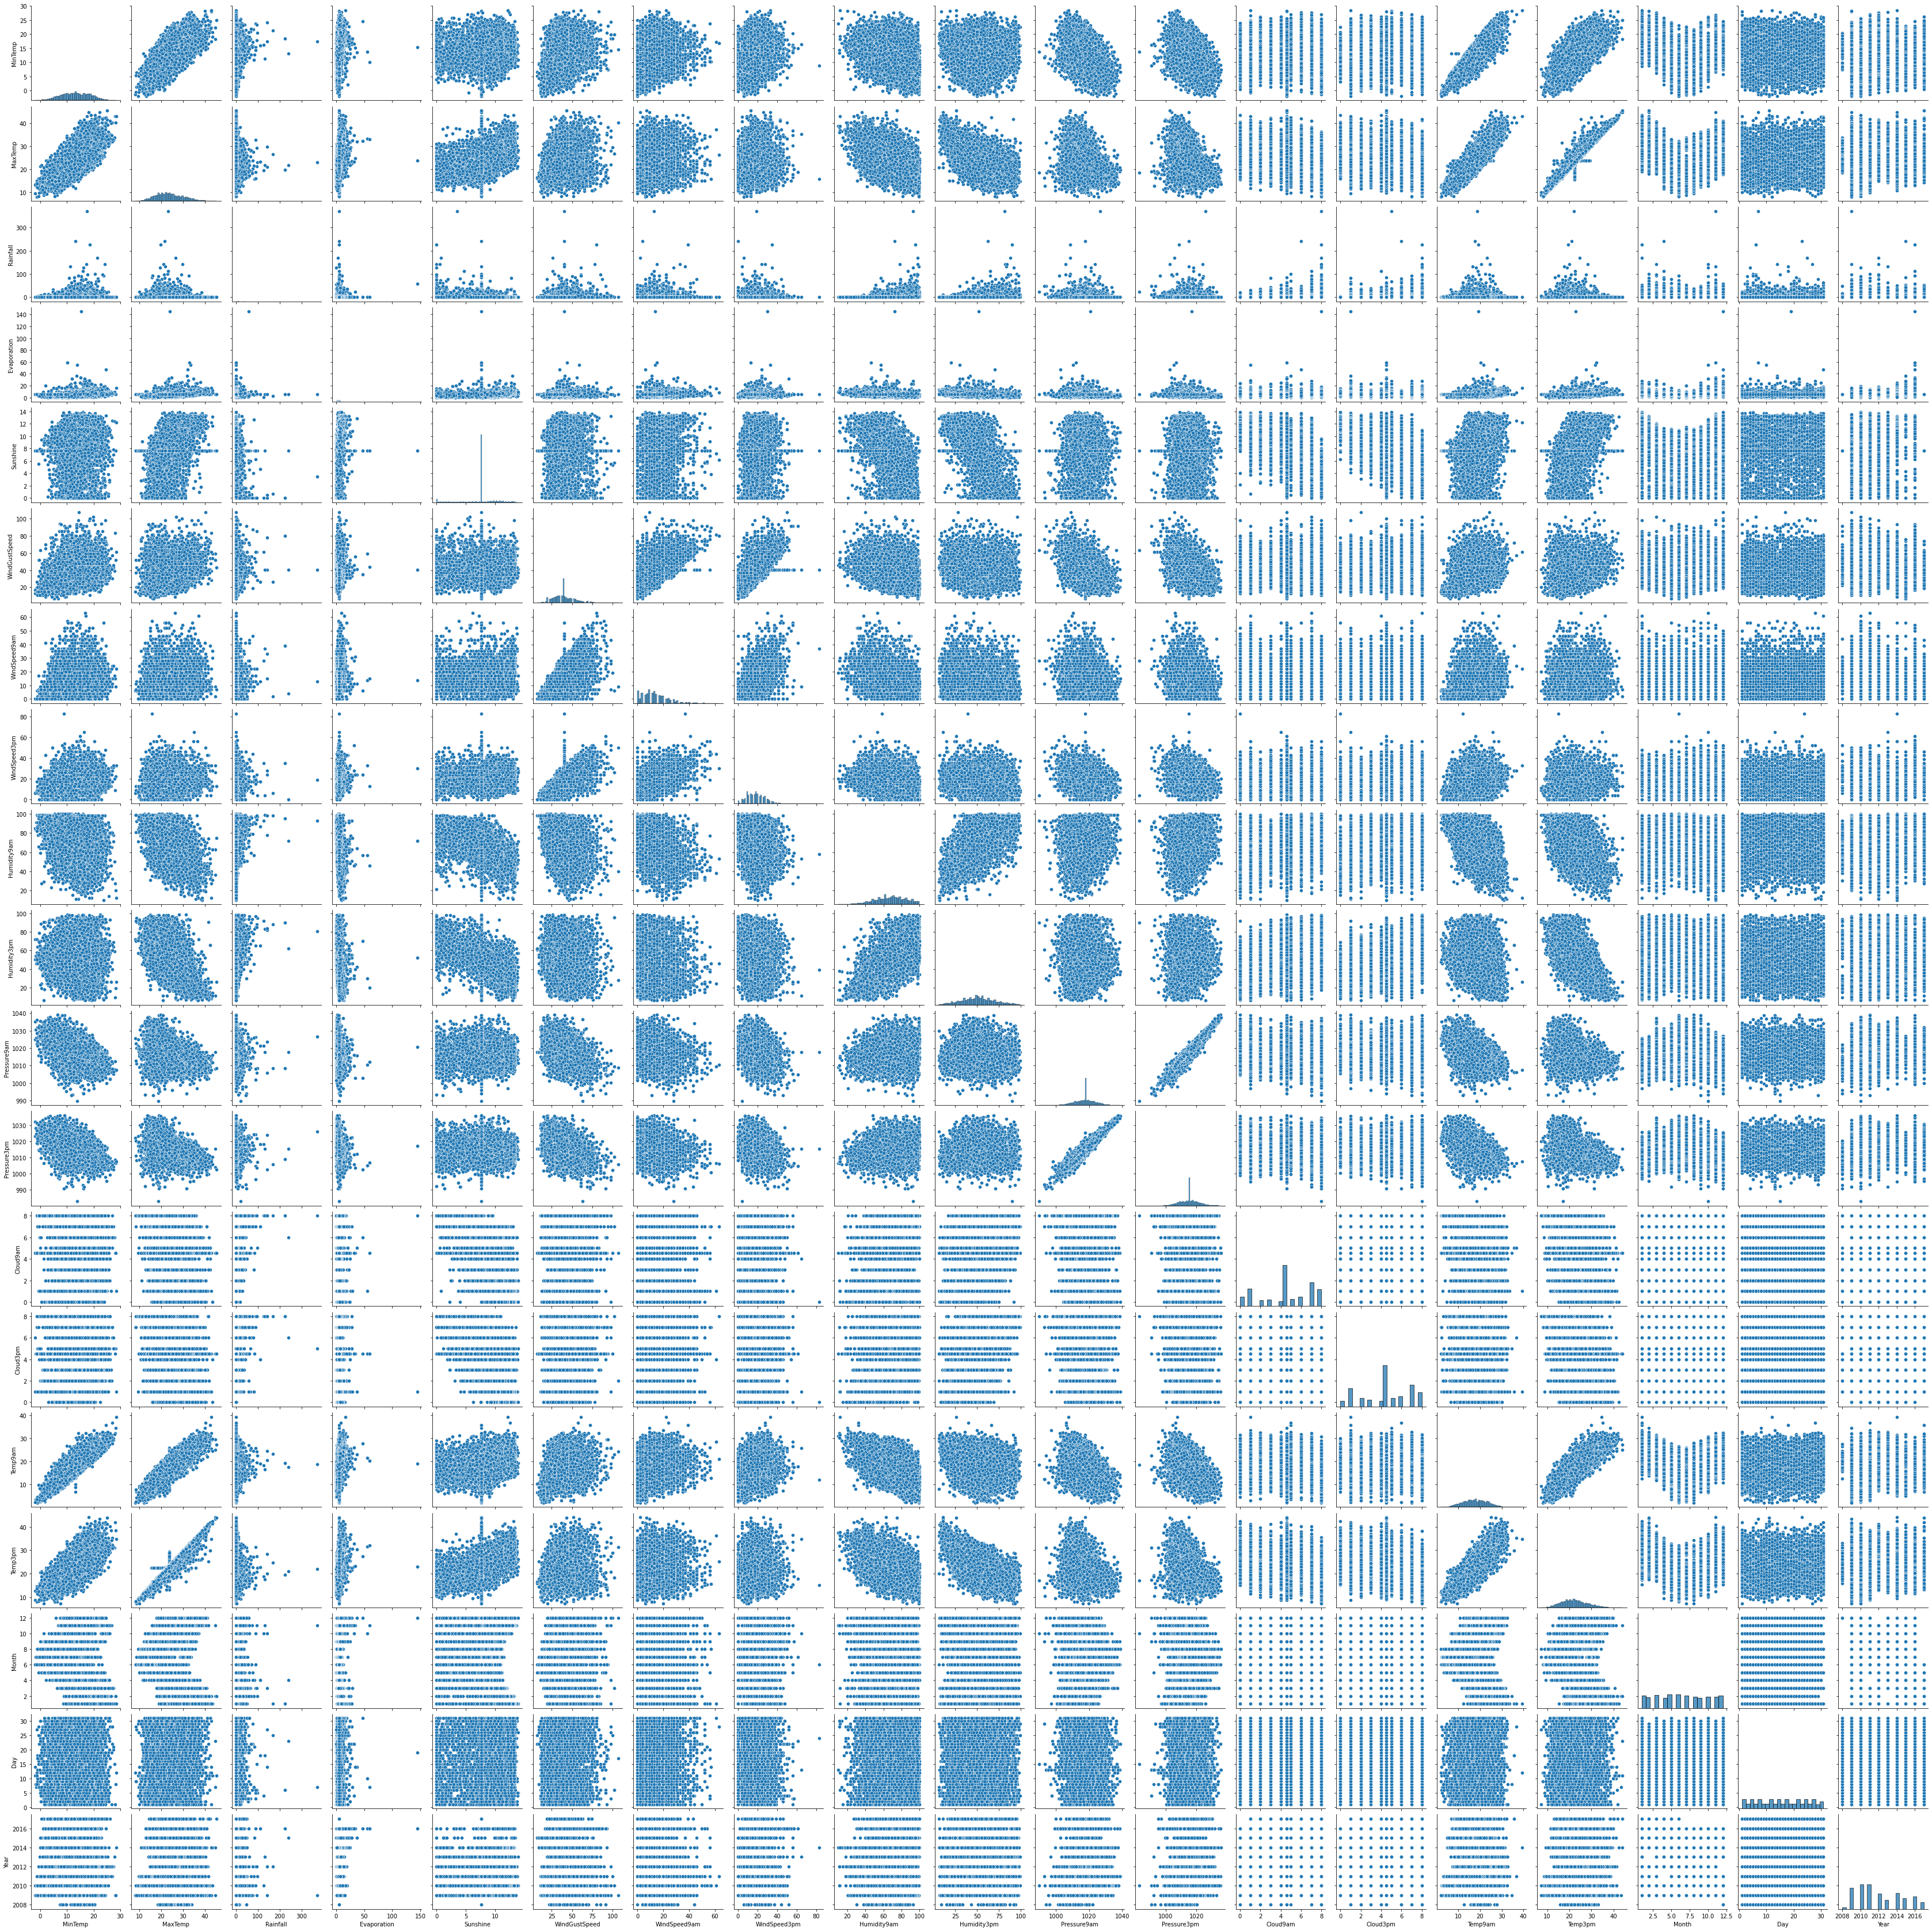

In [42]:
sns.pairplot(df)

In [43]:
df.drop('Date',axis=1,inplace=True)  #dropping date column as we separate columns for day, month & year

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:yla

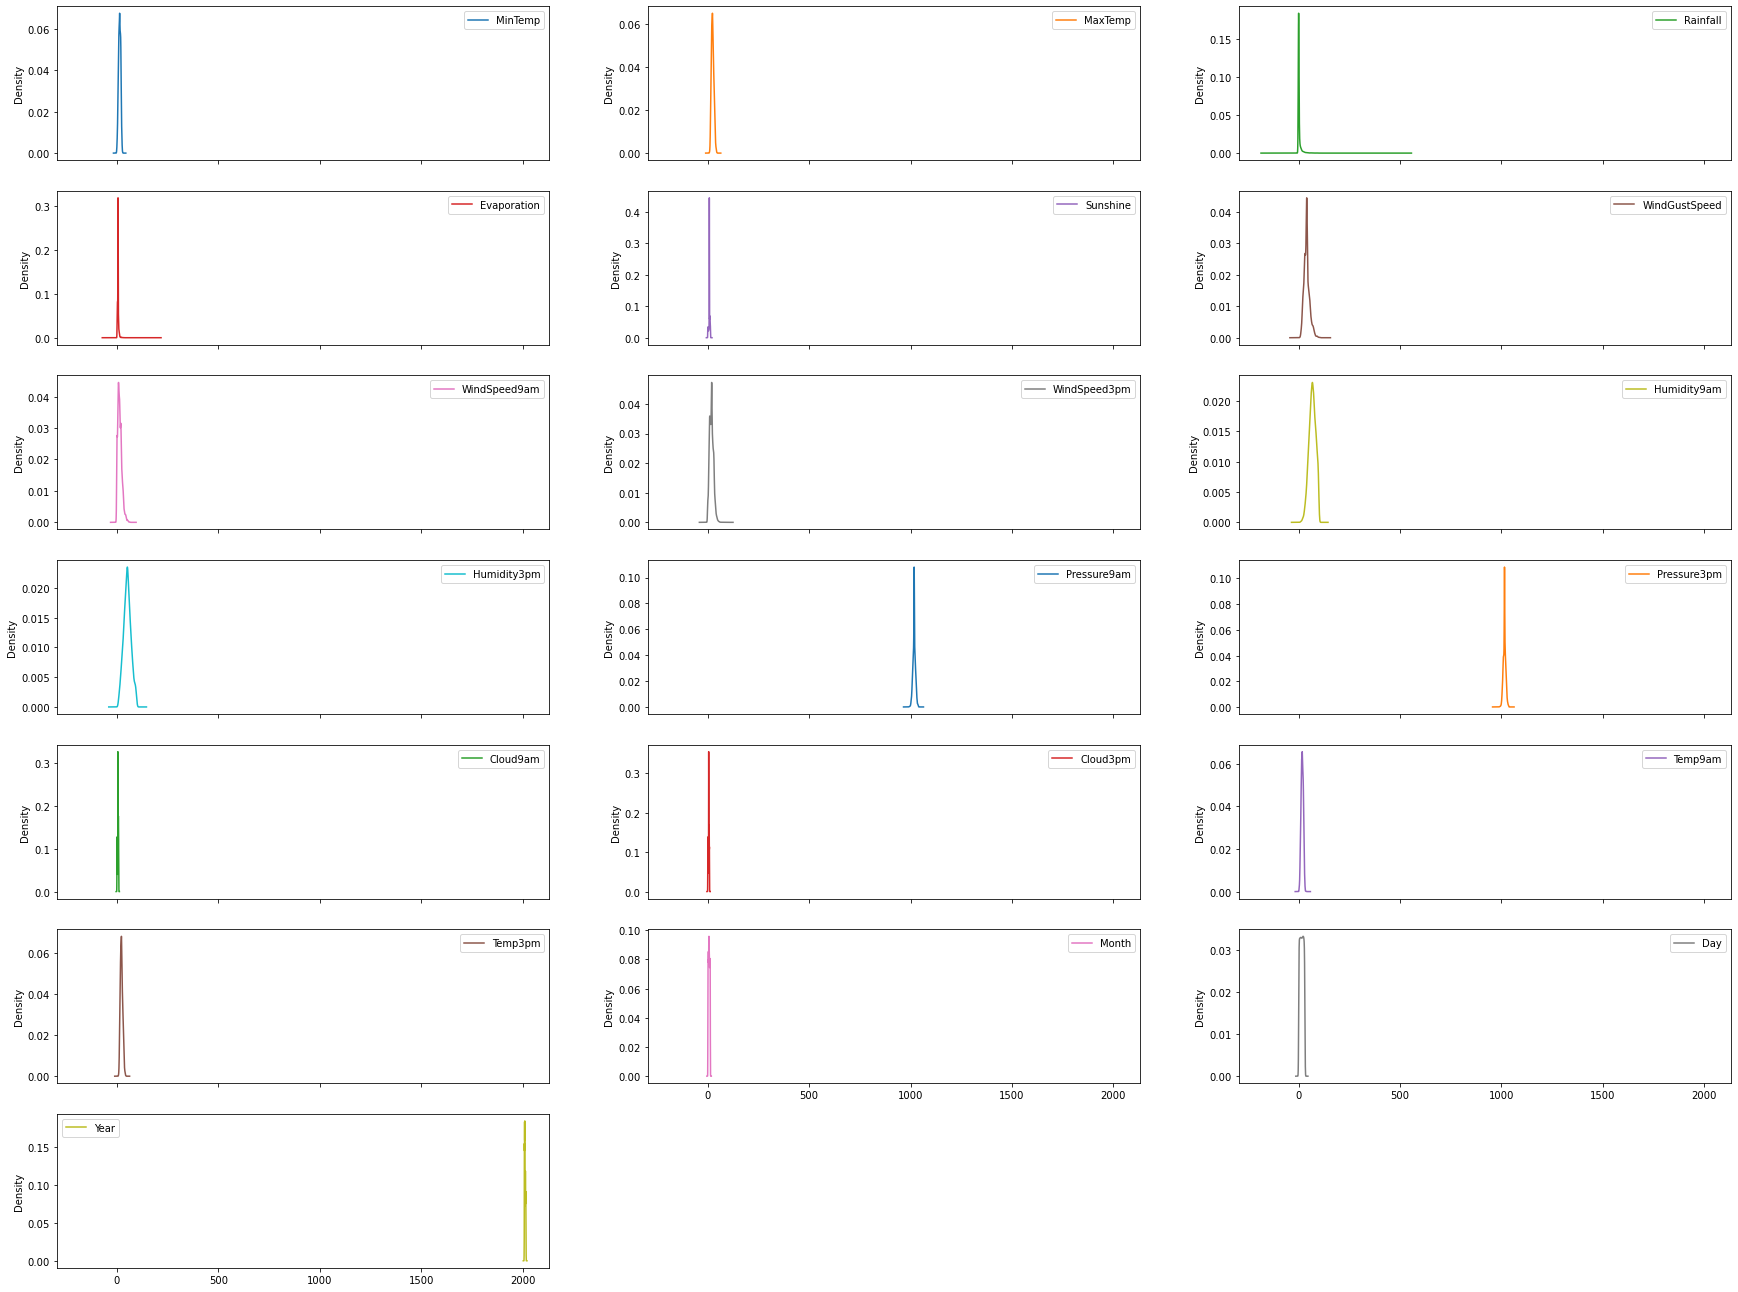

In [44]:
df.plot(kind='kde',subplots=True,layout=(9,3),figsize=(30,30))

Not much clear about the skewness

### Plotting the outliers

MinTemp             AxesSubplot(0.125,0.799681;0.227941x0.0803191)
MaxTemp          AxesSubplot(0.398529,0.799681;0.227941x0.0803191)
Rainfall         AxesSubplot(0.672059,0.799681;0.227941x0.0803191)
Evaporation         AxesSubplot(0.125,0.703298;0.227941x0.0803191)
Sunshine         AxesSubplot(0.398529,0.703298;0.227941x0.0803191)
WindGustSpeed    AxesSubplot(0.672059,0.703298;0.227941x0.0803191)
WindSpeed9am        AxesSubplot(0.125,0.606915;0.227941x0.0803191)
WindSpeed3pm     AxesSubplot(0.398529,0.606915;0.227941x0.0803191)
Humidity9am      AxesSubplot(0.672059,0.606915;0.227941x0.0803191)
Humidity3pm         AxesSubplot(0.125,0.510532;0.227941x0.0803191)
Pressure9am      AxesSubplot(0.398529,0.510532;0.227941x0.0803191)
Pressure3pm      AxesSubplot(0.672059,0.510532;0.227941x0.0803191)
Cloud9am            AxesSubplot(0.125,0.414149;0.227941x0.0803191)
Cloud3pm         AxesSubplot(0.398529,0.414149;0.227941x0.0803191)
Temp9am          AxesSubplot(0.672059,0.414149;0.227941x0.0803

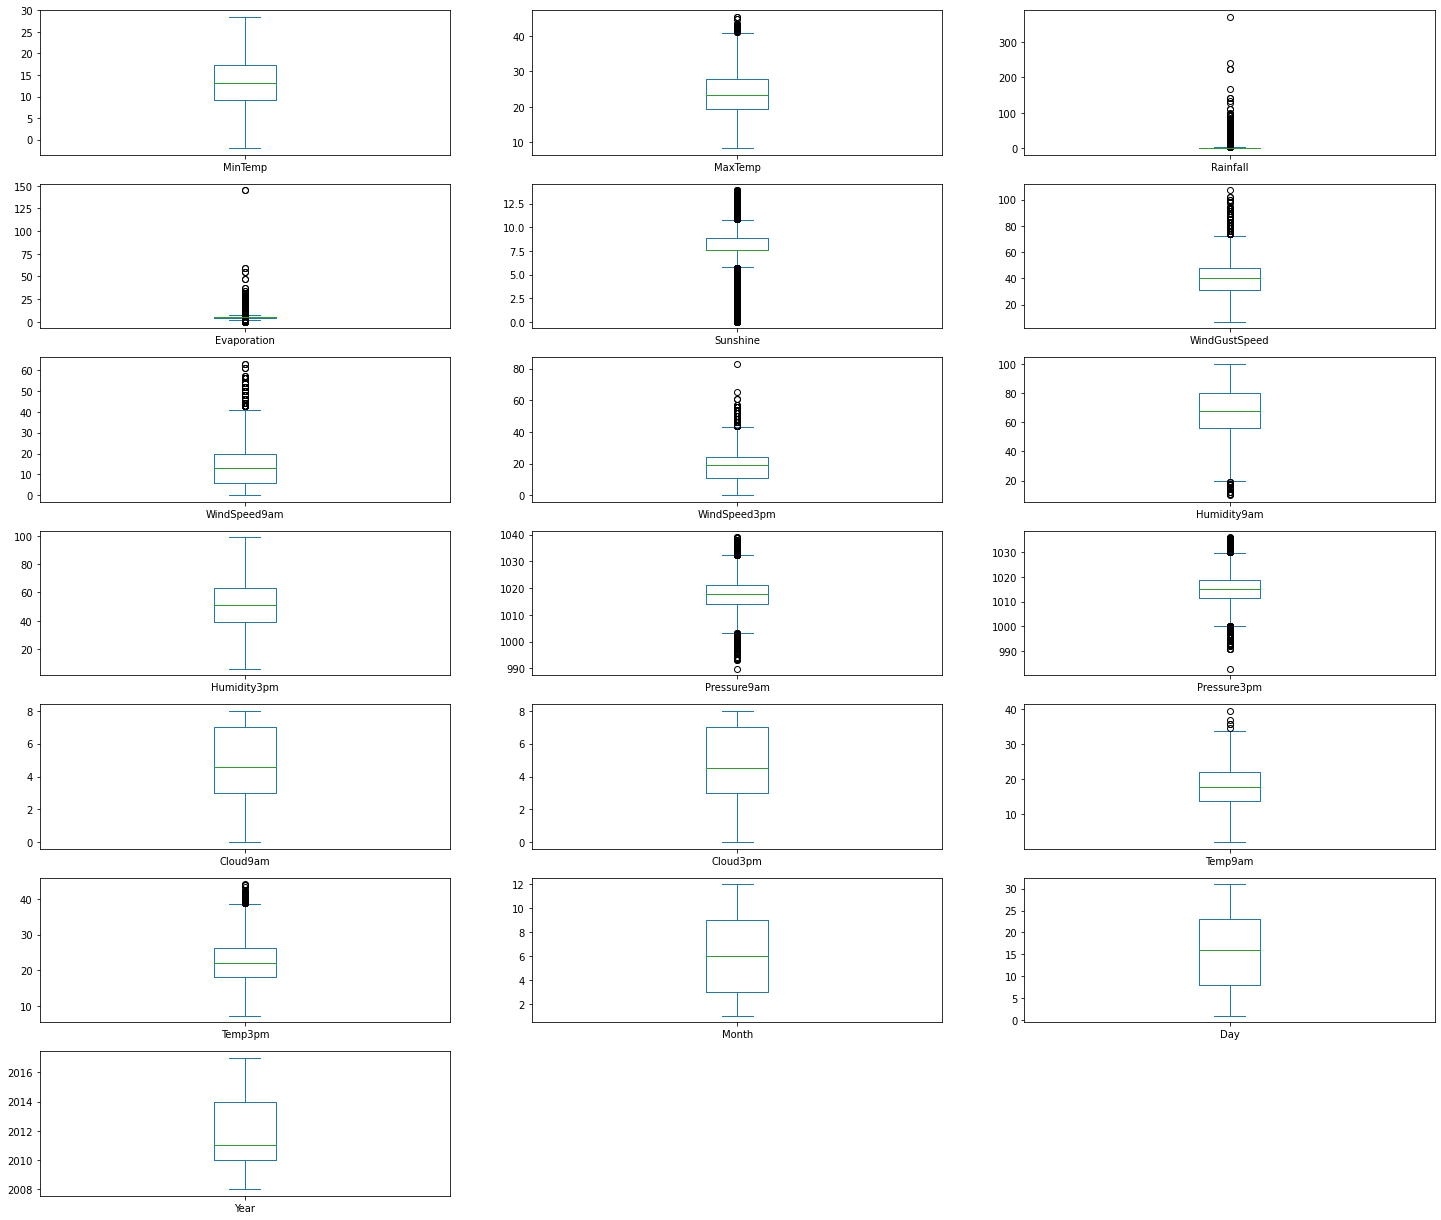

In [45]:
df.plot(kind='box',subplots=True,layout=(8,3),figsize=(25,25))

Outliers present in the dataset

### Label Encoding

In [46]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

list1=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))
    
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6     5.389395  7.632205           13   
1         1      7.4     25.1       0.0     5.389395  7.632205           14   
2         1     12.9     25.7       0.0     5.389395  7.632205           15   
3         1      9.2     28.0       0.0     5.389395  7.632205            4   
4         1     17.5     32.3       1.0     5.389395  7.632205           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0           44.0          13          14  ...       1007.1  8.000000   
1           44.0           6          15  ...       1007.8  4.566622   
2           46.0          13          15  ...       1008.7  4.566622   
3           24.0           9           0  ...       1012.8  4.566622   
4           41.0           1           7  ...       1006.0  7.000000   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Month  Day  Year  
0  4.503183     16.9     21.8          0             0     12    1  2008  
1  4.503183     17.2     24.3          0             0     12    2  2008  
2  2.000000     21.0     23.2          0             0     12    3  2008  
3  4.503183     18.1     26.5          0             0     12    4  2008  
4  8.000000     17.8     29.7          0             0     12    5  2008  

[5 rows x 25 columns]

### Statistical Summary

In [47]:
df.describe()

Location      MinTemp      MaxTemp     Rainfall  Evaporation  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean      5.793591    13.193305    23.859976     2.805913     5.389395   
std       3.162654     5.379488     6.114516    10.309308     3.852004   
min       0.000000    -2.000000     8.200000     0.000000     0.000000   
25%       3.000000     9.300000    19.300000     0.000000     4.000000   
50%       6.000000    13.200000    23.300000     0.000000     5.389395   
75%       8.000000    17.300000    28.000000     1.400000     5.389395   
max      11.000000    28.500000    45.500000   371.000000   145.000000   

          Sunshine  WindGustDir  WindGustSpeed   WindDir9am   WindDir3pm  ...  \
count  8425.000000  8425.000000    8425.000000  8425.000000  8425.000000  ...   
mean      7.632205     7.217804      40.174469     7.267418     7.810445  ...   
std       2.825451     4.702616      13.776101     4.588045     4.430162  ...   
min       0.000000     0.000000       7.000000     0.000000     0.000000  ...   
25%       7.632205     3.000000      31.000000     3.000000     4.000000  ...   
50%       7.632205     7.000000      40.174469     7.000000     8.000000  ...   
75%       8.900000    12.000000      48.000000    12.000000    11.000000  ...   
max      13.900000    15.000000     107.000000    15.000000    15.000000  ...   

       Pressure3pm     Cloud9am     Cloud3pm      Temp9am      Temp3pm  \
count  8425.000000  8425.000000  8425.000000  8425.000000  8425.000000   
mean   1015.236075     4.566622     4.503183    17.762015    22.442934   
std       6.217451     2.429205     2.299419     5.608301     5.945849   
min     982.900000     0.000000     0.000000     1.900000     7.300000   
25%    1011.400000     3.000000     3.000000    13.800000    18.100000   
50%    1015.236075     4.566622     4.503183    17.762015    22.000000   
75%    1018.800000     7.000000     7.000000    21.900000    26.300000   
max    1036.000000     8.000000     8.000000    39.400000    44.100000   

         RainToday  RainTomorrow        Month          Day         Year  
count  8425.000000   8425.000000  8425.000000  8425.000000  8425.000000  
mean      0.236202      0.236320     6.442136    15.741958  2012.102433  
std       0.424773      0.424846     3.437994     8.787354     2.473137  
min       0.000000      0.000000     1.000000     1.000000  2008.000000  
25%       0.000000      0.000000     3.000000     8.000000  2010.000000  
50%       0.000000      0.000000     6.000000    16.000000  2011.000000  
75%       0.000000      0.000000     9.000000    23.000000  2014.000000  
max       1.000000      1.000000    12.000000    31.000000  2017.000000  

[8 rows x 25 columns]

### Correlation

In [48]:
corr=df.corr()
corr

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
Location       1.000000  0.116531  0.064268  0.007693     0.143519  0.057817   
MinTemp        0.116531  1.000000  0.717522  0.087684     0.254965  0.056184   
MaxTemp        0.064268  0.717522  1.000000 -0.087451     0.322405  0.378403   
Rainfall       0.007693  0.087684 -0.087451  1.000000     0.023517 -0.169432   
Evaporation    0.143519  0.254965  0.322405  0.023517     1.000000  0.226001   
Sunshine       0.057817  0.056184  0.378403 -0.169432     0.226001  1.000000   
WindGustDir   -0.035408 -0.145316 -0.224670  0.038812    -0.078765 -0.105918   
WindGustSpeed  0.231396  0.230058  0.139998  0.086000     0.136371 -0.013778   
WindDir9am    -0.027103 -0.041650 -0.214119  0.093821    -0.061677 -0.076560   
WindDir3pm    -0.027736 -0.147166 -0.180622  0.038560    -0.047952 -0.068553   
WindSpeed9am   0.221378  0.136872  0.013314  0.050631     0.104294 -0.018069   
WindSpeed3pm   0.231801  0.178349  0.088172  0.024791     0.101126  0.030145   
Humidity9am    0.005662 -0.130731 -0.390976  0.228800    -0.213108 -0.360831   
Humidity3pm    0.055790  0.079048 -0.421879  0.235444    -0.161661 -0.440268   
Pressure9am   -0.032261 -0.429432 -0.325721 -0.072668    -0.177786  0.021887   
Pressure3pm   -0.020574 -0.422991 -0.403258 -0.033649    -0.189558 -0.035863   
Cloud9am       0.038019  0.091604 -0.253968  0.185444    -0.062283 -0.533391   
Cloud3pm       0.017561  0.038414 -0.250132  0.150760    -0.108022 -0.547304   
Temp9am        0.118051  0.887119  0.866039 -0.007083     0.305264  0.250640   
Temp3pm        0.060570  0.685520  0.974506 -0.090687     0.315109  0.395324   
RainToday      0.003071  0.064789 -0.224883  0.461106    -0.088654 -0.234230   
RainTomorrow   0.002824  0.092942 -0.152886  0.220021    -0.059012 -0.327731   
Month         -0.082407 -0.245854 -0.163253 -0.012244     0.004362 -0.006694   
Day           -0.002019  0.009446  0.015608 -0.013760     0.013597  0.004662   
Year           0.486405  0.044123  0.119772  0.006435     0.152708  0.065374   

               WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Location         -0.035408       0.231396   -0.027103   -0.027736  ...   
MinTemp          -0.145316       0.230058   -0.041650   -0.147166  ...   
MaxTemp          -0.224670       0.139998   -0.214119   -0.180622  ...   
Rainfall          0.038812       0.086000    0.093821    0.038560  ...   
Evaporation      -0.078765       0.136371   -0.061677   -0.047952  ...   
Sunshine         -0.105918      -0.013778   -0.076560   -0.068553  ...   
WindGustDir       1.000000       0.016591    0.403562    0.505799  ...   
WindGustSpeed     0.016591       1.000000   -0.072058    0.071235  ...   
WindDir9am        0.403562      -0.072058    1.000000    0.249527  ...   
WindDir3pm        0.505799       0.071235    0.249527    1.000000  ...   
WindSpeed9am      0.025399       0.600198    0.054272    0.025973  ...   
WindSpeed3pm      0.094623       0.634939    0.047116    0.068799  ...   
Humidity9am       0.036467      -0.269593    0.025604   -0.010312  ...   
Humidity3pm       0.053567      -0.091860    0.124556   -0.012167  ...   
Pressure9am      -0.109704      -0.407139   -0.011024   -0.136517  ...   
Pressure3pm      -0.024997      -0.372651    0.073446   -0.043681  ...   
Cloud9am          0.123883       0.023313    0.099582    0.075453  ...   
Cloud3pm          0.092979       0.078631    0.062947    0.053986  ...   
Temp9am          -0.176318       0.202298   -0.103111   -0.165072  ...   
Temp3pm          -0.238856       0.102199   -0.221634   -0.194463  ...   
RainToday         0.125188       0.076822    0.157324    0.100125  ...   
RainTomorrow      0.051832       0.190127    0.032860    0.008918  ...   
Month             0.034823       0.051968    0.012544    0.029384  ...   
Day               0.015683      -0.002876   -0.015154    0.003089  ...   
Year             -0.088340      -0.042402   -0.014498   -0.005812  ...   

         

<AxesSubplot:>

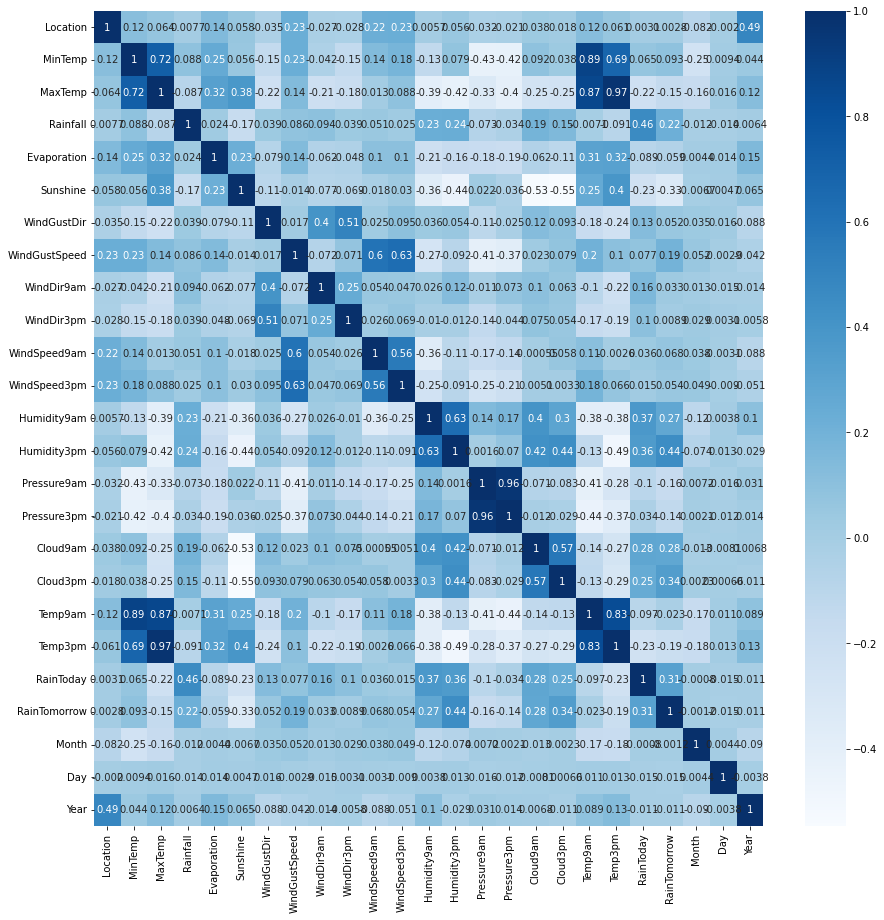

In [49]:
plt.figure(figsize=(15,15))  #plotting correlation using heatmap
sns.heatmap(corr,annot=True,cmap='Blues')

In [50]:
corr['RainTomorrow'].sort_values()  #sorting the correlation with Rain tomorrow column 

Sunshine        -0.327731
Temp3pm         -0.193805
Pressure9am     -0.163985
MaxTemp         -0.152886
Pressure3pm     -0.135242
Evaporation     -0.059012
Temp9am         -0.023211
Day             -0.015461
Year            -0.011066
Month           -0.001243
Location         0.002824
WindDir3pm       0.008918
WindDir9am       0.032860
WindGustDir      0.051832
WindSpeed3pm     0.053568
WindSpeed9am     0.068285
MinTemp          0.092942
WindGustSpeed    0.190127
Rainfall         0.220021
Humidity9am      0.271222
Cloud9am         0.278943
RainToday        0.312929
Cloud3pm         0.344369
Humidity3pm      0.444808
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

In [51]:
corr['Rainfall'].sort_values()  #sorting the correlation with rainfall column

Sunshine        -0.169432
Temp3pm         -0.090687
MaxTemp         -0.087451
Pressure9am     -0.072668
Pressure3pm     -0.033649
Day             -0.013760
Month           -0.012244
Temp9am         -0.007083
Year             0.006435
Location         0.007693
Evaporation      0.023517
WindSpeed3pm     0.024791
WindDir3pm       0.038560
WindGustDir      0.038812
WindSpeed9am     0.050631
WindGustSpeed    0.086000
MinTemp          0.087684
WindDir9am       0.093821
Cloud3pm         0.150760
Cloud9am         0.185444
RainTomorrow     0.220021
Humidity9am      0.228800
Humidity3pm      0.235444
RainToday        0.461106
Rainfall         1.000000
Name: Rainfall, dtype: float64

#### Checking the skewness

In [52]:
df.skew()

Location         -0.050456
MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustDir       0.119640
WindGustSpeed     0.757000
WindDir9am        0.172792
WindDir3pm       -0.119847
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
RainToday         1.242362
RainTomorrow      1.241588
Month             0.039388
Day               0.004260
Year              0.418663
dtype: float64

### Removing the outliers

In [53]:
#removing the outliers from the data

from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
print(np.where(z>3))
df_new=df[(z<3).all(axis=1)]
df=df_new
df.shape

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
         62,   62,   67,   68,   68,  123,  267,  296,  381,  381,  405,
        406,  407,  407,  431,  462,  563,  568,  568,  569,  602,  683,
        683,  699,  713,  748,  748,  770,  796,  797,  802,  928,  935,
        949,  979,  980,  980,  980, 1008, 1009, 1011, 1138, 1148, 1149,
       1151, 1189, 1202, 1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412,
       1413, 1479, 1480, 1481, 1513, 1535, 1587, 1644, 1661, 1665, 1673,
       1680, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2063,
       2074, 2108, 2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429,
       2488, 2500, 2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827,
       2835, 2849, 2849, 2855, 2859, 2863, 2869, 2877, 2883, 2890, 2891,
       2897, 2898, 2900, 2901, 2905, 2909, 2911, 2919, 2925, 2933, 2939,
       2947, 2953, 2961, 2967, 2975, 2989, 3003, 3051, 3051, 3058, 3059,
       3059, 3060, 3066, 3067, 3067, 3067, 3068, 3

(7987, 25)

In [54]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Month', 'Day', 'Year'],
      dtype='object')

###  1. Rain Tomorrow prediction

In [55]:
df=df[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Month', 'Day', 'Year','RainTomorrow']]

In [56]:
# dividing the columns for machine learning

#independent column
x=df.iloc[:,:-1]
#target value
y=df.iloc[:,-1]

In [57]:
#importing the different machine learning models

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [58]:
#defining the models 

lg=LogisticRegression()
rdc=RandomForestClassifier()
svc=SVC()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()

#### FInding the best random state

In [59]:
model=[lg,rdc,svc,dtc,knc]
maxAccu=0
bestRS=0
for i in range(40,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        bestRS=i
print('Best Accuracy score is', maxAccu , 'on random state', bestRS)

Best Accuracy score is 0.8410513141426783 on random state 49


In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=49,test_size=.30)

#### Logistic regression

In [61]:
lg.fit(x_train,y_train)
pred1=lg.predict(x_test)
acc=accuracy_score(y_test,pred1)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred1))
print('Classification Report: ','\n',classification_report(y_test,pred1))

Accuracy Score:  0.8410513141426783
Confusion Matrix:  
 [[1759  112]
 [ 269  257]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      1871
           1       0.70      0.49      0.57       526

    accuracy                           0.84      2397
   macro avg       0.78      0.71      0.74      2397
weighted avg       0.83      0.84      0.83      2397



#### Decision tree classifier

In [62]:
dtc.fit(x_train,y_train)
pred2=dtc.predict(x_test)
acc=accuracy_score(y_test,pred2)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred2))
print('Classification Report: ','\n',classification_report(y_test,pred2))

Accuracy Score:  0.8222778473091364
Confusion Matrix:  
 [[1631  240]
 [ 186  340]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.90      0.87      0.88      1871
           1       0.59      0.65      0.61       526

    accuracy                           0.82      2397
   macro avg       0.74      0.76      0.75      2397
weighted avg       0.83      0.82      0.83      2397



#### Support vector classifier

In [63]:
svc.fit(x_train,y_train)
pred3=svc.predict(x_test)
acc=accuracy_score(y_test,pred3)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred3))
print('Classification Report: ','\n',classification_report(y_test,pred3))

Accuracy Score:  0.7805590321234877
Confusion Matrix:  
 [[1871    0]
 [ 526    0]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      1871
           1       0.00      0.00      0.00       526

    accuracy                           0.78      2397
   macro avg       0.39      0.50      0.44      2397
weighted avg       0.61      0.78      0.68      2397



#### Random forest classifier

In [64]:
rdc.fit(x_train,y_train)
pred4=rdc.predict(x_test)
acc=accuracy_score(y_test,pred4)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred4))
print('Classification Report: ','\n',classification_report(y_test,pred4))

Accuracy Score:  0.8894451397580309
Confusion Matrix:  
 [[1803   68]
 [ 197  329]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1871
           1       0.83      0.63      0.71       526

    accuracy                           0.89      2397
   macro avg       0.87      0.79      0.82      2397
weighted avg       0.89      0.89      0.88      2397



#### KNeighbor classifier

In [65]:
knc.fit(x_train,y_train)
pred5=knc.predict(x_test)
acc=accuracy_score(y_test,pred5)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred5))
print('Classification Report: ','\n',classification_report(y_test,pred5))

Accuracy Score:  0.8356278681685441
Confusion Matrix:  
 [[1748  123]
 [ 271  255]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      1871
           1       0.67      0.48      0.56       526

    accuracy                           0.84      2397
   macro avg       0.77      0.71      0.73      2397
weighted avg       0.82      0.84      0.83      2397



#### Gaussian NB

In [66]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred6=gnb.predict(x_test)
acc=accuracy_score(y_test,pred6)
print('Accuracy Score: ',acc)
print('Confusion Matrix: ' ,'\n',confusion_matrix(y_test,pred6))
print('Classification Report: ','\n',classification_report(y_test,pred6))

Accuracy Score:  0.7863996662494785
Confusion Matrix:  
 [[1546  325]
 [ 187  339]]
Classification Report:  
               precision    recall  f1-score   support

           0       0.89      0.83      0.86      1871
           1       0.51      0.64      0.57       526

    accuracy                           0.79      2397
   macro avg       0.70      0.74      0.71      2397
weighted avg       0.81      0.79      0.79      2397



#### Cross val score

In [67]:
from sklearn.model_selection import cross_val_score
for i in range(3,7):
    cr=cross_val_score(rdc,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  3
cross val score =  83.88668152744584
at cv=  4
cross val score =  79.88042936147708
at cv=  5
cross val score =  84.92559970470289
at cv=  6
cross val score =  81.19406032629173


#### Hypermeter tuning

In [68]:
from sklearn.model_selection import GridSearchCV
# creating parameters
param={'criterion':['gini','entropy'],
      'max_features':['sqrt','log2','auto'],
      'max_depth':[2,3,4,5]}

GCV=GridSearchCV(rdc,param,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2'}

In [69]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8397997496871089

#### AUC ROC Curve

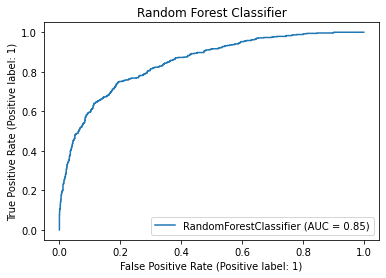

In [70]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('Random Forest Classifier')
plt.show()

Random forest classifier has an accuracy of 85%

#### Saving the model

In [90]:
import pickle
filename='raintomm.pkl'
pickle.dump(rdc, open(filename,'wb'))

#### Conclusion

In [73]:
a=np.array(y_test)
pred=np.array(GCV_pred)
Rain_tomorrow=pd.DataFrame({'Actual':a,'Predicted':pred})
Rain_tomorrow

Actual  Predicted
0          0          0
1          0          0
2          1          1
3          0          0
4          0          0
...      ...        ...
2392       0          0
2393       1          0
2394       0          0
2395       0          0
2396       0          0

[2397 rows x 2 columns]

###  2. Rainfall Prediction

In [74]:
df=df[['Location', 'MinTemp', 'MaxTemp', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'Month', 'Day', 'Year','RainTomorrow','Rainfall']]

In [75]:
# dividing the columns for machine learning

#independent column
x=df.iloc[:,:-1]
#target value
y=df.iloc[:,-1]

In [76]:
#importing the different machine learning models

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [77]:
# defining the different models

lg=LinearRegression()
rdr=RandomForestRegressor()
svr=SVR()
dtr=DecisionTreeRegressor()
knr=KNeighborsRegressor()

#### Finding the best random state

In [78]:
model=[lg,rdr,svr,dtr,knr]
maxAcc=0
maxRS=0
for i in range(40,60):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.30)
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Best Accuracy score is', maxAcc , 'on random state', maxRS)

Best Accuracy score is 0.5048554783602756 on random state 50


In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=50,test_size=.30)

#### Linear regression

In [80]:
lg.fit(x_train,y_train)
pred1=lg.predict(x_test)
acc=r2_score(y_test,pred1)
print('Accuracy Score: ',acc)

Accuracy Score:  0.5048554783602756


#### Decision tree classifier

In [81]:
dtr.fit(x_train,y_train)
pred2=dtr.predict(x_test)
acc=r2_score(y_test,pred2)
print('Accuracy Score: ',acc)

Accuracy Score:  0.29681915587909846


#### Support vector regressor

In [82]:
svr.fit(x_train,y_train)
pred3=svr.predict(x_test)
acc=r2_score(y_test,pred3)
print('Accuracy Score: ',acc)

Accuracy Score:  -0.13875150194731423


#### KNeigbor regressor

In [83]:
knr.fit(x_train,y_train)
pred4=knr.predict(x_test)
acc=r2_score(y_test,pred4)
print('Accuracy Score: ',acc)

Accuracy Score:  0.15178421114107143


#### Random forest regressor

In [84]:
rdr.fit(x_train,y_train)
pred5=rdr.predict(x_test)
acc=r2_score(y_test,pred5)
print('Accuracy Score: ',acc)

Accuracy Score:  0.6281319924926452


#### Lasso regression

In [85]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
pred6=ls.predict(x_test)
acc=r2_score(y_test,pred6)
print('Accuracy Score: ',acc)

Accuracy Score:  0.5048593531698942


#### Cross val score

In [86]:
from sklearn.model_selection import cross_val_score
for i in range(3,7):
    cr=cross_val_score(rdr,x,y,cv=i)
    cr_mean=cr.mean()
    print("at cv= ", i)
    print('cross val score = ',cr_mean*100)

at cv=  3
cross val score =  51.87421729072167
at cv=  4
cross val score =  49.44405567213773
at cv=  5
cross val score =  57.55905193693059
at cv=  6
cross val score =  57.96386100001077


#### Hypermeter tuning

In [87]:
from sklearn.model_selection import GridSearchCV
# creating parameters
param={'criterion':['squared_error', 'absolute_error', 'poisson'],
      'max_features':['sqrt','log2','auto']}

GCV=GridSearchCV(rdr,param,cv=6,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'squared_error', 'max_features': 'sqrt'}

In [88]:
GCV_pred=GCV.best_estimator_.predict(x_test)
r2_score(y_test,GCV_pred)

0.620618420716846

####  calculating the errors

In [89]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
l1=[pred1,pred2,pred3,pred4,pred5,pred6]
for i in l1:
    print('error:')

    print('mean absolute error: ',mean_absolute_error(y_test,i))
    print('mean squared error: ',mean_squared_error(y_test,i))
    print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,i)))
    print('\n')

error:
mean absolute error:  1.605006398951536
mean squared error:  11.637288667760663
root mean squared error:  3.411347045927849


error:
mean absolute error:  1.2897891963814476
mean squared error:  16.526727270606298
root mean squared error:  4.065307770711376


error:
mean absolute error:  2.00930473254443
mean squared error:  26.763862609489358
root mean squared error:  5.173380191856129


error:
mean absolute error:  2.197357745848571
mean squared error:  19.935456328619015
root mean squared error:  4.46491392174799


error:
mean absolute error:  1.120226469759976
mean squared error:  8.739943916448835
root mean squared error:  2.9563396145315974


error:
mean absolute error:  1.6044184847009118
mean squared error:  11.637197598838169
root mean squared error:  3.4113336979601057




We are getting the least errors with Random forest regressor model

#### Saving the model

In [91]:
import pickle
filename='rainfallamount.pkl'
pickle.dump(rdr, open(filename,'wb'))

#### Conclusion

In [92]:
a=np.array(y_test)
pred=np.array(GCV_pred)
Rainfall=pd.DataFrame({'Actual':a,'Predicted':pred})
Rainfall

Actual  Predicted
0        0.0   0.280355
1       30.8   6.817059
2        0.0   0.200237
3        0.6   0.546355
4        0.0   0.129000
...      ...        ...
2392     0.0   0.028000
2393     0.0   0.348000
2394     0.0   0.024000
2395     0.0   0.450828
2396     0.0   0.144296

[2397 rows x 2 columns]